# Load Data

In [1]:
import pandas as pd

start_time = pd.Timestamp.now()
df_jan = pd.read_csv('../../data/bicing/processed/months/2023_01_STATIONS.csv')
df_feb = pd.read_csv('../../data/bicing/processed/months/2023_02_STATIONS.csv')
df_march = pd.read_csv('../../data/bicing/processed/months/2023_03_STATIONS.csv')
df_april = pd.read_csv('../../data/bicing/processed/months/2023_04_STATIONS.csv')
df_may = pd.read_csv('../../data/bicing/processed/months/2023_05_STATIONS.csv')
df_june = pd.read_csv('../../data/bicing/processed/months/2023_06_STATIONS.csv')
df_july = pd.read_csv('../../data/bicing/processed/months/2023_07_STATIONS.csv')
df_aug = pd.read_csv('../../data/bicing/processed/months/2023_08_STATIONS.csv')
df_sep = pd.read_csv('../../data/bicing/processed/months/2023_09_STATIONS.csv')
df_oct = pd.read_csv('../../data/bicing/processed/months/2023_10_STATIONS.csv')
df_nov = pd.read_csv('../../data/bicing/processed/months/2023_11_STATIONS.csv')
df_dec = pd.read_csv('../../data/bicing/processed/months/2023_12_STATIONS.csv')


## Filter Month and Year 

In [2]:
df_jan = df_jan[(df_jan['month'] == 1) & (df_jan['year'] == 2023)]
df_feb = df_feb[(df_feb['month'] == 2) & (df_feb['year'] == 2023)]
df_march = df_march[(df_march['month'] == 3) & (df_march['year'] == 2023)]
df_april = df_april[(df_april['month'] == 4) & (df_april['year'] == 2023)]
df_may = df_may[(df_may['month'] == 5) & (df_may['year'] == 2023)]
df_june = df_june[(df_june['month'] == 6) & (df_june['year'] == 2023)]
df_july = df_july[(df_july['month'] == 7) & (df_july['year'] == 2023)]
df_aug = df_aug[(df_aug['month'] == 8) & (df_aug['year'] == 2023)]
df_sep = df_sep[(df_sep['month'] == 9) & (df_sep['year'] == 2023)]
df_oct = df_oct[(df_oct['month'] == 10) & (df_oct['year'] == 2023)]
df_nov = df_nov[(df_nov['month'] == 11) & (df_nov['year'] == 2023)]
df_dec = df_dec[(df_dec['month'] == 12) & (df_dec['year'] == 2023)]

## Sort Dataset by date

In [3]:
df_2023 = pd.concat([df_jan, df_feb, df_march, df_april, df_may, df_june, df_july, df_aug, df_sep, df_oct, df_nov, df_dec])
df_2023.sort_values(by=['grouped_date'], inplace=True)
df_2023.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,status,is_renting,is_returning,year,month,day,hour,grouped_minute,day_of_week,is_weekend,grouped_date,docking_available,bikes_available,bikes_available.mechanical,bikes_available.ebike
3826,1,37,35,2,9,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-1-1 0:00,True,True,True,True
4396,185,9,4,5,8,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-1-1 0:00,True,True,True,True
4397,188,23,20,3,4,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-1-1 0:00,True,True,True,True
4398,196,6,1,5,21,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-1-1 0:00,True,True,True,True
4399,201,2,0,2,22,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-1-1 0:00,True,True,False,True


## Feature Eng: Add season

In [4]:
df_2023['grouped_date'] = pd.to_datetime(df_2023['grouped_date'])
df_2023['season'] = df_2023['grouped_date'].dt.month.apply(lambda x: 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Autumn' if x in [9, 10, 11] else 'Winter')
df_2023.head(4)

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,status,is_renting,is_returning,year,month,...,hour,grouped_minute,day_of_week,is_weekend,grouped_date,docking_available,bikes_available,bikes_available.mechanical,bikes_available.ebike,season
3826,1,37,35,2,9,IN_SERVICE,1,1,2023,1,...,0,0,6,1,2023-01-01,True,True,True,True,Winter
4396,185,9,4,5,8,IN_SERVICE,1,1,2023,1,...,0,0,6,1,2023-01-01,True,True,True,True,Winter
4397,188,23,20,3,4,IN_SERVICE,1,1,2023,1,...,0,0,6,1,2023-01-01,True,True,True,True,Winter
4398,196,6,1,5,21,IN_SERVICE,1,1,2023,1,...,0,0,6,1,2023-01-01,True,True,True,True,Winter


## Feature Eng: Add Weather info

In [5]:
df_weather = pd.read_csv('../../data/weather_clean.csv')

df_weather.head(3)

,date,hour,temperature,rainfall
0,2023-01-01,0,15,0.0
1,2023-01-01,1,14,0.0
2,2023-01-01,2,14,0.0


In [6]:
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather['day'] = df_weather['date'].dt.day.astype(int)
df_weather['month'] = df_weather['date'].dt.month.astype(int)
df_weather['year'] = df_weather['date'].dt.year.astype(int)
df_weather['hour'] = df_weather['hour'].astype(int)

In [7]:
df_2023_weather = pd.merge(df_2023, df_weather, on=['year', 'month', 'day', 'hour'], how='left')
df_2023_weather.head(3)

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,status,is_renting,is_returning,year,month,...,is_weekend,grouped_date,docking_available,bikes_available,bikes_available.mechanical,bikes_available.ebike,season,date,temperature,rainfall
0,1,37,35,2,9,IN_SERVICE,1,1,2023,1,...,1,2023-01-01,True,True,True,True,Winter,2023-01-01,15,0.0
1,185,9,4,5,8,IN_SERVICE,1,1,2023,1,...,1,2023-01-01,True,True,True,True,Winter,2023-01-01,15,0.0
2,188,23,20,3,4,IN_SERVICE,1,1,2023,1,...,1,2023-01-01,True,True,True,True,Winter,2023-01-01,15,0.0


## FE: Add Stations info (altitude, capacity, district etc)

In [8]:
station_info_df = pd.read_csv('../../data/bicing/processed/2024_STATION_LOCATIONS.csv', dtype={'post_code': str})
station_info_df.head()

,station_id,lat,lon,altitude,post_code,capacity,address,district
0,1,41.397978,2.180107,16.0,08013,46,"GRAN VIA CORTS CATALANES, 760",Eixample
1,2,41.395488,2.177198,17.0,08013,29,"C/ ROGER DE FLOR, 126",Eixample
2,3,41.394156,2.181331,11.0,08013,27,"C/ NÀPOLS, 82",Eixample
3,4,41.393317,2.181248,8.0,08013,21,"C/ RIBES, 13",Eixample
4,5,41.391103,2.180176,7.0,08018,39,"PG. LLUIS COMPANYS, 11 (ARC TRIOMF)",Sant Martí


In [9]:
df_2023_weather_station = pd.merge(df_2023_weather, station_info_df, on='station_id', how='left')
df_2023_weather_station.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,status,is_renting,is_returning,year,month,...,date,temperature,rainfall,lat,lon,altitude,post_code,capacity,address,district
0,1,37,35,2,9,IN_SERVICE,1,1,2023,1,...,2023-01-01,15,0.0,41.397978,2.180107,16.0,08013,46.0,"GRAN VIA CORTS CATALANES, 760",Eixample
1,185,9,4,5,8,IN_SERVICE,1,1,2023,1,...,2023-01-01,15,0.0,41.370372,2.138944,20.0,08014,17.0,"C/GAVÀ, 81",Sants-Montjuïc
2,188,23,20,3,4,IN_SERVICE,1,1,2023,1,...,2023-01-01,15,0.0,41.375695,2.135857,30.0,08014,27.0,PG. SANT ANTONI /PL. SANTS,Sants-Montjuïc
3,196,6,1,5,21,IN_SERVICE,1,1,2023,1,...,2023-01-01,15,0.0,41.383261,2.139266,38.0,08029,27.0,"C/ BERLÍN, 38",Les Corts
4,201,2,0,2,22,IN_SERVICE,1,1,2023,1,...,2023-01-01,15,0.0,41.387806,2.134422,55.0,08029,24.0,"C/ NUMÀNCIA, 136",Les Corts


In [10]:
df_2023_weather_station.columns

Index(['station_id', 'num_bikes_available', 'num_bikes_available_types.mechanical', 'num_bikes_available_types.ebike', 'num_docks_available', 'status', 'is_renting', 'is_returning', 'year', 'month', 'day', 'hour', 'grouped_minute', 'day_of_week', 'is_weekend', 'grouped_date', 'docking_available', 'bikes_available', 'bikes_available.mechanical', 'bikes_available.ebike', 'season', 'date', 'temperature', 'rainfall', 'lat', 'lon', 'altitude', 'post_code', 'capacity', 'address', 'district'], dtype='object')

In [11]:
columns_to_keep = ['station_id', 'num_bikes_available',
                   'num_bikes_available_types.mechanical',
                   'num_bikes_available_types.ebike', 'num_docks_available', 'status',
                   'is_renting', 'is_returning', 'day_of_week', 'is_weekend', 'grouped_date',
                   'docking_available', 'bikes_available', 'bikes_available.mechanical',
                   'bikes_available.ebike', 'temperature', 'rainfall', 'lat', 'lon', 'post_code', 'altitude', 'capacity', 'year', 'month', 'day', 'hour','season'
       'grouped_minute']

df_2023_ml = df_2023_weather_station
df_2023_ml.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,status,is_renting,is_returning,year,month,day,hour,grouped_minute,day_of_week,is_weekend,grouped_date,docking_available,bikes_available,bikes_available.mechanical,bikes_available.ebike,season,date,temperature,rainfall,lat,lon,altitude,post_code,capacity,address,district
0,1,37,35,2,9,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-01-01,True,True,True,True,Winter,2023-01-01,15,0.0,41.397978,2.180107,16.0,08013,46.0,"GRAN VIA CORTS CATALANES, 760",Eixample
1,185,9,4,5,8,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-01-01,True,True,True,True,Winter,2023-01-01,15,0.0,41.370372,2.138944,20.0,08014,17.0,"C/GAVÀ, 81",Sants-Montjuïc
2,188,23,20,3,4,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-01-01,True,True,True,True,Winter,2023-01-01,15,0.0,41.375695,2.135857,30.0,08014,27.0,PG. SANT ANTONI /PL. SANTS,Sants-Montjuïc
3,196,6,1,5,21,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-01-01,True,True,True,True,Winter,2023-01-01,15,0.0,41.383261,2.139266,38.0,08029,27.0,"C/ BERLÍN, 38",Les Corts
4,201,2,0,2,22,IN_SERVICE,1,1,2023,1,1,0,0,6,1,2023-01-01,True,True,False,True,Winter,2023-01-01,15,0.0,41.387806,2.134422,55.0,08029,24.0,"C/ NUMÀNCIA, 136",Les Corts


## Remove Station 520 missing station info

In [12]:
df_2023_ml[df_2023_ml['capacity'].isnull()]['station_id'].unique()
#Station 520 missing information
df_2023_ml = df_2023_ml[df_2023_ml['station_id'] != 520]

In [13]:
df_2023_ml.isnull().sum()

station_id                              0
num_bikes_available                     0
num_bikes_available_types.mechanical    0
num_bikes_available_types.ebike         0
num_docks_available                     0
status                                  0
is_renting                              0
is_returning                            0
year                                    0
month                                   0
day                                     0
hour                                    0
grouped_minute                          0
day_of_week                             0
is_weekend                              0
grouped_date                            0
docking_available                       0
bikes_available                         0
bikes_available.mechanical              0
bikes_available.ebike                   0
season                                  0
date                                    0
temperature                             0
rainfall                          

In [14]:
df_2023_ml['grouped_date'] = pd.to_datetime(df_2023_ml['grouped_date'])

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_64682/2227770550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_ml['grouped_date'] = pd.to_datetime(df_2023_ml['grouped_date'])


## FE: Add bank holidays

In [15]:
holidays = ['01/06/2023', '04/07/2023', '04/10/2023', '05/01/2023', '06/24/2023', '08/15/2023', '09/11/2023', '10/12/2023', '11/01/2023', '12/06/2023', '12/08/2023', '12/25/2023', '12/26/2023']
df_2023_ml['is_holiday'] = df_2023_ml['grouped_date'].isin(holidays)
df_2023_ml[df_2023_ml['is_holiday'] == True]['grouped_date']

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_64682/2482286237.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_2023_ml['is_holiday'] = df_2023_ml['grouped_date'].isin(holidays)
/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_64682/2482286237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_ml['is_holiday'] = df_2023_ml['grouped_date'].isin(holidays)


1935575    2023-01-06
1935576    2023-01-06
1935577    2023-01-06
1935578    2023-01-06
1935579    2023-01-06
              ...    
26002052   2023-09-11
26002053   2023-09-11
26002054   2023-09-11
26002055   2023-09-11
26002056   2023-09-11
Name: grouped_date, Length: 8928, dtype: datetime64[ns]

## Target Variable: Docking Percentage

In [16]:
df_2023_ml['percentage_docks_available'] = df_2023_ml['num_docks_available'] / df_2023_ml['capacity']
df_2023_ml.head(5)

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_64682/150156111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_ml['percentage_docks_available'] = df_2023_ml['num_docks_available'] / df_2023_ml['capacity']


,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,status,is_renting,is_returning,year,month,...,rainfall,lat,lon,altitude,post_code,capacity,address,district,is_holiday,percentage_docks_available
0,1,37,35,2,9,IN_SERVICE,1,1,2023,1,...,0.0,41.397978,2.180107,16.0,08013,46.0,"GRAN VIA CORTS CATALANES, 760",Eixample,False,0.195652
1,185,9,4,5,8,IN_SERVICE,1,1,2023,1,...,0.0,41.370372,2.138944,20.0,08014,17.0,"C/GAVÀ, 81",Sants-Montjuïc,False,0.470588
2,188,23,20,3,4,IN_SERVICE,1,1,2023,1,...,0.0,41.375695,2.135857,30.0,08014,27.0,PG. SANT ANTONI /PL. SANTS,Sants-Montjuïc,False,0.148148
3,196,6,1,5,21,IN_SERVICE,1,1,2023,1,...,0.0,41.383261,2.139266,38.0,08029,27.0,"C/ BERLÍN, 38",Les Corts,False,0.777778
4,201,2,0,2,22,IN_SERVICE,1,1,2023,1,...,0.0,41.387806,2.134422,55.0,08029,24.0,"C/ NUMÀNCIA, 136",Les Corts,False,0.916667


## FE: Week Number

In [17]:
df_2023_ml['week_number'] = df_2023_ml['grouped_date'].dt.isocalendar().week

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_64682/3535076674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_ml['week_number'] = df_2023_ml['grouped_date'].dt.isocalendar().week


## FE: IS Summer

In [18]:
df_2023_ml['is_summer'] = df_2023_ml['season'] == 'Summer'

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_64682/1510188512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_ml['is_summer'] = df_2023_ml['season'] == 'Summer'


In [68]:
end_time = pd.Timestamp.now()
#print(f"Time to process: {end_time - start_time} ml")
len(df_2023_ml)
df_2023_ml.columns

Index(['station_id', 'num_bikes_available',
       'num_bikes_available_types.mechanical',
       'num_bikes_available_types.ebike', 'num_docks_available', 'status',
       'is_renting', 'is_returning', 'year', 'month', 'day', 'hour',
       'grouped_minute', 'day_of_week', 'is_weekend', 'grouped_date',
       'docking_available', 'bikes_available', 'bikes_available.mechanical',
       'bikes_available.ebike', 'season', 'date', 'temperature', 'rainfall',
       'lat', 'lon', 'altitude', 'post_code', 'capacity', 'address',
       'district', 'is_holiday', 'percentage_docks_available', 'week_number',
       'is_summer'],
      dtype='object')

In [19]:
#filter stations if needed
stations_ids = df_2023_ml['station_id'].unique()
# get 5 random stations
import random
filter_stations = random.sample(list(stations_ids), 5)
#filter_stations = [57, 446]
filter_stations = [57, 32, 31, 378, 446]
df_a = df_2023_ml[df_2023_ml['station_id'].isin(filter_stations)]
#df_a = df_2023_ml
df_a.columns

Index(['station_id', 'num_bikes_available',
       'num_bikes_available_types.mechanical',
       'num_bikes_available_types.ebike', 'num_docks_available', 'status',
       'is_renting', 'is_returning', 'year', 'month', 'day', 'hour',
       'grouped_minute', 'day_of_week', 'is_weekend', 'grouped_date',
       'docking_available', 'bikes_available', 'bikes_available.mechanical',
       'bikes_available.ebike', 'season', 'date', 'temperature', 'rainfall',
       'lat', 'lon', 'altitude', 'post_code', 'capacity', 'address',
       'district', 'is_holiday', 'percentage_docks_available', 'week_number',
       'is_summer'],
      dtype='object')

# Reduce Dataset

## 1 station 2023 complete - YEAR

* The historical data for August '23 does not have data from the 22nd to the 31st due to a technical incident.
* The historical data for September '23 does not have data from the 1st to the 5th due to a technical incident.

In [69]:
df_station_57 = df_2023_ml[df_2023_ml['station_id'] == 57]
df_station_57['month'].unique()
df_station_57.sort_values('grouped_date', inplace=True)
df_station_57.columns

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_64682/2415883936.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['station_id', 'num_bikes_available',
       'num_bikes_available_types.mechanical',
       'num_bikes_available_types.ebike', 'num_docks_available', 'status',
       'is_renting', 'is_returning', 'year', 'month', 'day', 'hour',
       'grouped_minute', 'day_of_week', 'is_weekend', 'grouped_date',
       'docking_available', 'bikes_available', 'bikes_available.mechanical',
       'bikes_available.ebike', 'season', 'date', 'temperature', 'rainfall',
       'lat', 'lon', 'altitude', 'post_code', 'capacity', 'address',
       'district', 'is_holiday', 'percentage_docks_available', 'week_number',
       'is_summer'],
      dtype='object')

In [71]:
features = ['day_of_week', 'hour', 'grouped_minute', 'temperature', 'rainfall',
            'capacity',  'altitude', 'is_weekend', 'season', 'month','docking_available','grouped_date','station_id','day']
df_station_57 = df_station_57[features]

# drop duplicates
print(len(df_station_57))
df_station_57.drop_duplicates(inplace=True)
print(len(df_station_57))

# check for missing values
df_station_57.isna().sum()


#find duplicated records by grouped_date
print(df_station_57['grouped_date'].duplicated().sum())

#keep one record per grouped_date, keep docking_available as the last status of the duplicates
df_station_57.drop_duplicates(subset='grouped_date', keep='last', inplace=True)
print(df_station_57['grouped_date'].duplicated().sum(), len(df_station_57))


32213
32213
0
0 32213


### Missing Data in the Dataset

In [38]:
# The historical data for August '23 does not have data from the 22nd to the 31st due to a technical incident.
df_station_57[(df_station_57['month'] == 8) & (df_station_57['day'] >= 22)]
#2023-08-22 20:15:00	
# The historical data for September '23 does not have data from the 1st to the 5th due to a technical incident.
df_station_57[(df_station_57['month'] == 9) & (df_station_57['day'] >= 5)]
#2023-09-05 10:30:00

,day_of_week,hour,grouped_minute,temperature,rainfall,capacity,altitude,is_weekend,season,month,docking_available,grouped_date,station_id,day
25334681,1,0,0,29,0.0,25.0,4.0,0,Summer,8,True,2023-08-22 00:00:00,57,22
25335134,1,0,15,29,0.0,25.0,4.0,0,Summer,8,True,2023-08-22 00:15:00,57,22
25336231,1,0,30,29,0.0,25.0,4.0,0,Summer,8,True,2023-08-22 00:30:00,57,22
25336918,1,0,45,29,0.0,25.0,4.0,0,Summer,8,True,2023-08-22 00:45:00,57,22
25376207,1,1,0,29,0.0,25.0,4.0,0,Summer,8,True,2023-08-22 01:00:00,57,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25373465,1,19,15,30,0.0,25.0,4.0,0,Summer,8,True,2023-08-22 19:15:00,57,22
25373834,1,19,30,30,0.0,25.0,4.0,0,Summer,8,True,2023-08-22 19:30:00,57,22
25374842,1,19,45,30,0.0,25.0,4.0,0,Summer,8,True,2023-08-22 19:45:00,57,22
25379100,1,20,0,30,0.0,25.0,4.0,0,Summer,8,True,2023-08-22 20:00:00,57,22


### Create Year Datasets


In [50]:
df_year_dates = pd.date_range(start='2023-01-01', end='2024-01-1', freq='15T')
#Delete jan 1st
df_year_dates = df_year_dates[:-1]
print(len(df_year_dates), 365*24*4)
df_year_dates

# remove the dates with missing data >= 2023-08-22 20:30:00	& <= 2023-09-05 10:15:00
df_year_dates = df_year_dates[(df_year_dates < '2023-08-22 20:30:00') | (df_year_dates > '2023-09-05 10:15:00')]
#validate '2023-08-22 20:30:00' is not in the list
#'2023-08-22 20:30:00' in df_year_dates
print(len(df_year_dates), 365*24*4 - 14*24*4)

35040 35040
33736 33696


/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_64682/1557563881.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_year_dates = pd.date_range(start='2023-01-01', end='2024-01-1', freq='15T')


### Check missing values in the Dates

In [54]:
missing_quarters = ~df_year_dates.isin(df_station_57['grouped_date'])
print(len(df_year_dates[missing_quarters]), len(df_station_57) )

1523 32213


### Fill in with data from previous records

In [55]:
#add missing quarters interpolated
missing_quarters_df = df_year_dates[missing_quarters]
# create a dataframe with the missing quarters
df_missing = pd.DataFrame(missing_quarters_df, columns=['grouped_date'])
#merge with the original dataframe
df_station_57_merged = pd.merge(df_station_57, df_missing, on='grouped_date', how='outer')
#sort by date
#df_may_merged.sort_values(['station_id', 'grouped_date'], inplace=True)
df_station_57_filled = df_station_57_merged.sort_values(['grouped_date']).fillna(method='ffill')
print(len(df_station_57_filled))
df_station_57_filled.isna().sum()

33736


/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_64682/1568775838.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_station_57_filled = df_station_57_merged.sort_values(['grouped_date']).fillna(method='ffill')
/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_64682/1568775838.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_station_57_filled = df_station_57_merged.sort_values(['grouped_date']).fillna(method='ffill')


day_of_week          0
hour                 0
grouped_minute       0
temperature          0
rainfall             0
capacity             0
altitude             0
is_weekend           0
season               0
month                0
docking_available    0
grouped_date         0
station_id           0
day                  0
dtype: int64

### LSTM

In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, LeakyReLU, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical



df_lstm_2 = df_station_57_filled.copy()
df_lstm_2['hour_minute'] = df_station_57_filled['hour'] + df_station_57_filled['grouped_minute'] / 60
df_lstm_2['day'] = df_station_57_filled['grouped_date'].dt.day.astype(int)
# Assuming df_rfg is your DataFrame
# Feature and target definition

features = ['day_of_week', 'hour_minute', 'temperature', 'rainfall',
             'season', 'is_weekend', 'month']

target = 'docking_available'

# Encoding categorical features
categorical_features = ['day_of_week',  'is_weekend', 'hour_minute', 'season', 'month']
numerical_features = ['temperature', 'rainfall']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Process features
X = df_lstm_2[features]
y = df_lstm_2[target]

X_processed = preprocessor.fit_transform(X)

# Create sequences
def create_sequences(data, target, sequence_length=24):
    X_seq, y_seq = [], []
    for i in range(len(data) - sequence_length):
        X_seq.append(data[i:i + sequence_length])
        y_seq.append(target[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

sequence_length = 24
X_processed = X_processed.toarray() 
X_seq, y_seq = create_sequences(X_processed, y.values, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

num_classes = len(np.unique(y))

# Convert target variable to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# Build LSTM model
model = Sequential()
#model.add(LSTM(50, activation='relu', input_shape=(sequence_length, X_seq.shape[2])))
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, X_seq.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu'))
#model.add(Dense(9500, activation='relu'))
#model.add(Dense(1024))
#model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=30, batch_size=32, validation_split=0.2, n_jobs=-1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels



/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.6849 - loss: 0.6275 - val_accuracy: 0.6999 - val_loss: 0.5663
Epoch 2/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 68s 100ms/step - accuracy: 0.7100 - loss: 0.5601 - val_accuracy: 0.7100 - val_loss: 0.5399
Epoch 3/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 62s 92ms/step - accuracy: 0.7139 - loss: 0.5373 - val_accuracy: 0.7325 - val_loss: 0.5282
Epoch 4/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 66s 97ms/step - accuracy: 0.7298 - loss: 0.5199 - val_accuracy: 0.7317 - val_loss: 0.5172
Epoch 5/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 58s 85ms/step - accuracy: 0.7439 - loss: 0.5062 - val_accuracy: 0.7416 - val_loss: 0.5106
Epoch 6/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 64s 94ms/step - accuracy: 0.7438 - loss: 0.4959 - val_accuracy: 0.7447 - val_loss: 0.4969
Epoch 7/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 66s 98ms/step - accuracy: 0.7598 - loss: 0.4773 - val_accuracy: 0.7573 - val_loss: 0.4876
Epoch 8/30
675/675 ━━━━━━━━━━━━━━━━━━━━ 61s 90ms/step - accuracy: 0.7560 - loss: 0.4764 -

In [117]:
# save model
filename = 'models/lstm_model_no_tunning.pkl'
pickle.dump(model, open(filename, 'wb'))

### Metrics

Accuracy: 0.7919323743141035
Confusion Matrix:
 [[1098  833]
 [ 570 4242]]
Classification Report:
               precision    recall  f1-score   support

       False       0.66      0.57      0.61      1931
        True       0.84      0.88      0.86      4812

    accuracy                           0.79      6743
   macro avg       0.75      0.73      0.73      6743
weighted avg       0.79      0.79      0.79      6743

Precision:  0.8358620689655173
Recall:  0.8815461346633416
F1 Score:  0.8580964903408517
ROC AUC:  0.7250817157003916


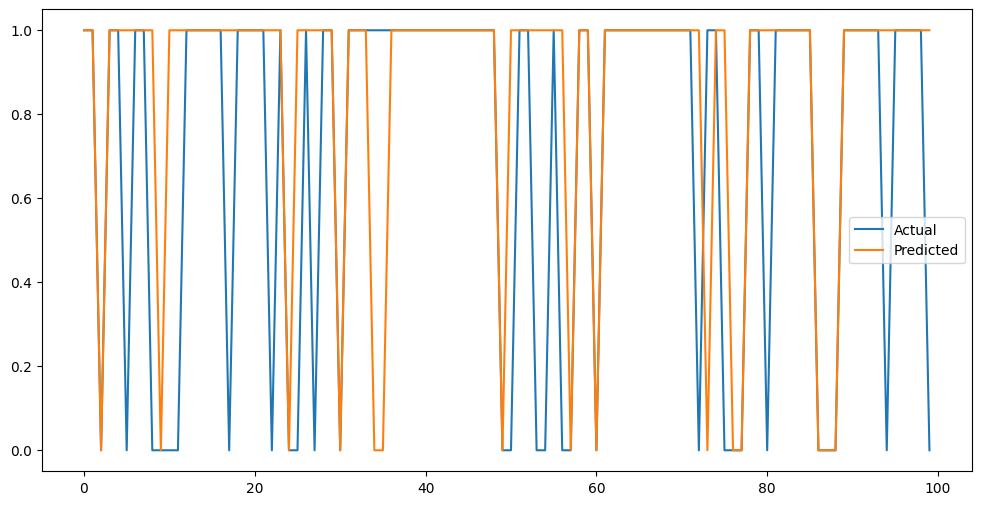

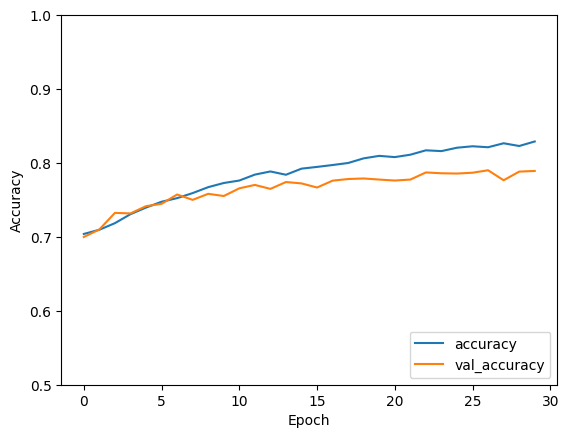

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
# Evaluate Accuracy, precision, recall, F1-score, ROC curve, AUC.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("ROC AUC: ", roc_auc)

# Plotting the training history
import matplotlib.pyplot as plt

# Example to show some predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [90]:
import plotly.express as px
fig = px.imshow(conf_matrix, text_auto=True,labels=dict(x="Predicted", y="True", color="Count"))
fig.update_layout(title='Confusion Matrix')
fig.update_xaxes(title_text='Predicted', tickvals = [0, 1], ticktext = ['No', 'Yes'])
fig.update_yaxes(title_text='True', tickvals = [0, 1], ticktext = ['No', 'Yes'])
fig.show()

### Hyperparameter Tunning

#### Random Search

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

# Assuming df_may_filled is your DataFrame
df_lstm_3 = df_station_57_filled.copy()
df_lstm_3['day'] = df_station_57_filled['grouped_date'].dt.day.astype(int)
df_lstm_3['hour_minute'] = df_station_57_filled['hour'] + df_station_57_filled['grouped_minute'] / 60

features = ['day_of_week', 'hour_minute', 'temperature', 'rainfall',
             'season', 'is_weekend', 'month']
target = 'docking_available'

# Encoding categorical features
categorical_features = ['day_of_week',  'is_weekend', 'hour_minute', 'season', 'month']
numerical_features = ['temperature', 'rainfall']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X = df_lstm_3[features]
y = df_lstm_3[target]

X_processed = preprocessor.fit_transform(X)

def create_sequences(data, target, sequence_length=10):
    X_seq, y_seq = [], []
    for i in range(len(data) - sequence_length):
        X_seq.append(data[i:i + sequence_length])
        y_seq.append(target[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

sequence_length = 24
X_processed = X_processed.toarray() 
X_seq, y_seq = create_sequences(X_processed, y.values, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

num_classes = len(np.unique(y))

y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(sequence_length, X_seq.shape[2]), return_sequences=True))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # You can adjust the number of trials
    executions_per_trial=3,  # Number of models to be built and fit for each trial
    directory='tuner_dir_year',
    project_name='lstm_tuning'
)
tuner.reload()
tuner.search(X_train, y_train_encoded, epochs=15, batch_size=32, validation_split=0.2, n_jobs=-1)

best_model = tuner.get_best_models(num_models=1)[0]

loss, accuracy = best_model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Trial 5 Complete [00h 06m 50s]
val_accuracy: 0.7651093602180481

Best val_accuracy So Far: 0.7874798973401388
Total elapsed time: 04h 18m 49s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
512               |416               |units
0.4               |0.2               |dropout
0.00059356        |0.0001125         |learning_rate

Epoch 1/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 255s 373ms/step - accuracy: 0.7040 - loss: 0.6013 - val_accuracy: 0.7089 - val_loss: 0.6153
Epoch 2/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 255s 378ms/step - accuracy: 0.7185 - loss: 0.5691 - val_accuracy: 0.7206 - val_loss: 0.5375
Epoch 3/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 513s 761ms/step - accuracy: 0.7270 - loss: 0.5390 - val_accuracy: 0.7316 - val_loss: 0.5233
Epoch 4/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 460s 681ms/step - accuracy: 0.7413 - loss: 0.5183 - val_accuracy: 0.7340 - val_loss: 0.6248
Epoch 5/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 386s 572ms/step - accuracy: 0.7532 - loss: 0.6030 - val_accuracy: 0

KeyboardInterrupt: 

#### GRidSearch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Assuming df_station_57_filled is your DataFrame
df_lstm_2 = df_station_57_filled.copy()
df_lstm_2['hour_minute'] = df_station_57_filled['hour'] + df_station_57_filled['grouped_minute'] / 60
df_lstm_2['day'] = df_station_57_filled['grouped_date'].dt.day.astype(int)

# Feature and target definition
features = ['day_of_week', 'hour_minute', 'temperature', 'rainfall', 'season', 'is_weekend', 'month']
target = 'docking_available'

# Encoding categorical features
categorical_features = ['day_of_week', 'is_weekend', 'hour_minute', 'season', 'month']
numerical_features = ['temperature', 'rainfall']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Process features
X = df_lstm_2[features]
y = df_lstm_2[target]

X_processed = preprocessor.fit_transform(X)

# Create sequences
def create_sequences(data, target, sequence_length=24):
    X_seq, y_seq = [], []
    for i in range(len(data) - sequence_length):
        X_seq.append(data[i:i + sequence_length])
        y_seq.append(target[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

sequence_length = 24
X_processed = X_processed.toarray()
X_seq, y_seq = create_sequences(X_processed, y.values, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

num_classes = len(np.unique(y))

# Convert target variable to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# Define the function to build the model
def build_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=(sequence_length, X_seq.shape[2]), return_sequences=True))
    model.add(LSTM(units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Use a custom optimizer with a variable learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(model=build_model, epochs=25, batch_size=32, verbose=1)

# Define the parameter grid for grid search
param_grid = {
    'model__units': [415, 400],
    'model__dropout_rate': [0.2],
    'model__learning_rate': [0.0001125 , 0.005]
}

# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_result = grid.fit(X_train, y_train_encoded)

# Summarize the results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print(f"{mean} ({std}) with: {param}")

# Evaluate the best model
best_model = grid_result.best_estimator_
loss, accuracy = best_model.model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot the learning curve
history = best_model.model.history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.6884 - loss: 0.6020
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7031 - loss: 0.5671
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7187 - loss: 0.5551
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7221 - loss: 0.5327
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7328 - loss: 0.5177
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7460 - loss: 0.5039
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7504 - loss: 0.4969
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7525 - loss: 0.4910
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7566 - loss: 0.4742
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7599 - loss: 0.4742
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7759 - loss: 0.4527
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.6990 - loss: 0.6026
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7125 - loss: 0.5559
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7262 - loss: 0.5379
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7316 - loss: 0.5367
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7431 - loss: 0.5211
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7486 - loss: 0.5029
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7560 - loss: 0.4848
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7671 - loss: 0.4717
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7758 - loss: 0.4518
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7764 - loss: 0.4518
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7849 - loss: 0.4382
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7030 - loss: 0.6045
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7129 - loss: 0.5621
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7103 - loss: 0.5548
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7269 - loss: 0.5261
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7399 - loss: 0.5151
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7450 - loss: 0.5015
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7491 - loss: 0.4990
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7577 - loss: 0.4754
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7640 - loss: 0.4701
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7631 - loss: 0.4671
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7702 - loss: 0.4636
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.7022 - loss: 0.6084
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.7132 - loss: 0.5680
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7172 - loss: 0.5378
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7285 - loss: 0.5351
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7424 - loss: 0.5133
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.7501 - loss: 0.5172
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7575 - loss: 0.4830
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7656 - loss: 0.4614
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.7746 - loss: 0.4503
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 35s 63ms/step - accuracy: 0.7803 - loss: 0.4385
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 38s 67ms/step - accuracy: 0.7768 - loss: 0.4405
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 58s 85ms/step - accuracy: 0.6925 - loss: 0.7594
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 51s 90ms/step - accuracy: 0.7143 - loss: 0.6917
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 54s 97ms/step - accuracy: 0.7213 - loss: 0.5501
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 59s 104ms/step - accuracy: 0.7354 - loss: 0.7270
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 56s 99ms/step - accuracy: 0.7364 - loss: 0.5219
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 54s 96ms/step - accuracy: 0.7514 - loss: 0.5002
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 64s 113ms/step - accuracy: 0.7601 - loss: 0.4894
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 61s 108ms/step - accuracy: 0.7571 - loss: 0.4805
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 62s 111ms/step - accuracy: 0.7696 - loss: 0.4605
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 61s 109ms/step - accuracy: 0.7707 - loss: 0.4680
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 63s 113ms/step - accuracy: 0.7759 - loss: 0.4572
Epoch 12/15
562/562 ━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 52s 68ms/step - accuracy: 0.7022 - loss: 0.6020
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 38s 67ms/step - accuracy: 0.7115 - loss: 0.6224
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.7240 - loss: 0.5311
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 43s 77ms/step - accuracy: 0.7307 - loss: 0.5209
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 43s 76ms/step - accuracy: 0.7421 - loss: 0.5071
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.7474 - loss: 0.4950
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.7570 - loss: 0.4815
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.7663 - loss: 0.4692
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.7719 - loss: 0.4528
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 39s 70ms/step - accuracy: 0.7837 - loss: 0.4363
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.7859 - loss: 0.4323
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.6987 - loss: 0.6268
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 36s 64ms/step - accuracy: 0.7065 - loss: 0.7253
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 37s 66ms/step - accuracy: 0.7114 - loss: 0.5662
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.7247 - loss: 0.5670
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.7407 - loss: 0.5098
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.7551 - loss: 0.4938
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.7582 - loss: 0.4834
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.7679 - loss: 0.4750
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.7749 - loss: 0.4572
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.7737 - loss: 0.4453
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.7893 - loss: 0.4337
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.7056 - loss: 0.6331
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.7118 - loss: 0.5642
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7258 - loss: 0.5377
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7418 - loss: 0.5185
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.7461 - loss: 0.6198
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.7569 - loss: 0.4944
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - accuracy: 0.7583 - loss: 0.4891
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.7686 - loss: 0.4784
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 31s 54ms/step - accuracy: 0.7735 - loss: 0.4656
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 32s 56ms/step - accuracy: 0.7881 - loss: 0.4343
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.7866 - loss: 0.4296
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.7045 - loss: 0.6449
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.7178 - loss: 0.5540
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.7232 - loss: 0.5310
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.7296 - loss: 0.5704
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7466 - loss: 0.5060
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.7585 - loss: 0.4895
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.7605 - loss: 0.4722
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.7775 - loss: 0.4546
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.7784 - loss: 0.4495
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - accuracy: 0.7808 - loss: 0.4404
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 34s 61ms/step - accuracy: 0.7946 - loss: 0.4166
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7024 - loss: 0.6542
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7054 - loss: 0.5880
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7109 - loss: 0.5665
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7210 - loss: 0.5459
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7260 - loss: 0.5381
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7200 - loss: 3.0312
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.6953 - loss: 2.3254
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7046 - loss: 0.6032
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7064 - loss: 0.6005
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7082 - loss: 0.5971
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7059 - loss: 0.5979
Epoch 12/15
562/562 ━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7047 - loss: 0.5994
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7018 - loss: 0.6976
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7206 - loss: 0.5543
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7241 - loss: 0.5475
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7217 - loss: 0.5525
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7334 - loss: 0.5351
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7387 - loss: 0.5489
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7424 - loss: 0.5161
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7524 - loss: 0.5087
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7445 - loss: 0.5831
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7114 - loss: 0.5914
Epoch 12/15
562/562 ━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7012 - loss: 0.6199
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7051 - loss: 0.5757
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7119 - loss: 0.5516
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7185 - loss: 0.5435
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7197 - loss: 0.5382
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7358 - loss: 0.5148
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7442 - loss: 0.5011
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7521 - loss: 0.4865
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7649 - loss: 0.4728
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7740 - loss: 0.4588
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7708 - loss: 0.4559
Epoch 12/15
562/562 ━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.6988 - loss: 0.7138
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.7073 - loss: 0.5766
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7098 - loss: 0.5594
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.7112 - loss: 0.6331
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.6973 - loss: 0.6571
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.7076 - loss: 0.5823
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.7060 - loss: 0.5802
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.7080 - loss: 0.5695
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.6917 - loss: 32.4177
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7010 - loss: 0.5957
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.6980 - loss: 0.5873
Epoch 12/15
562/562 ━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.7003 - loss: 0.6129
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7096 - loss: 0.5819
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7112 - loss: 0.5702
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.7148 - loss: 0.5576
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7218 - loss: 0.5579
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.6887 - loss: 103.7899
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7070 - loss: 0.6599
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7102 - loss: 1.4127
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.7037 - loss: 0.7336
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.7006 - loss: 0.6108
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7034 - loss: 0.6084
Epoch 12/15
562/562 ━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.7087 - loss: 0.6739
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7144 - loss: 0.5698
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7076 - loss: 0.5625
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7181 - loss: 0.6347
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7053 - loss: 0.6137
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.6948 - loss: 11.4221
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7054 - loss: 0.6104
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.6937 - loss: 0.7226
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.6983 - loss: 0.7053
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7108 - loss: 0.6022
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7030 - loss: 0.6036
Epoch 12/15
562/562 ━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.7026 - loss: 0.9129
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.7053 - loss: 0.6219
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7011 - loss: 1.1902
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7001 - loss: 0.6014
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7023 - loss: 0.5891
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7021 - loss: 0.5812
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.6591 - loss: 1839.7424
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.6973 - loss: 0.8818
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7060 - loss: 0.6059
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7020 - loss: 0.6218
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.6839 - loss: 12.2914
Epoch 12/15
562/562 ━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.7103 - loss: 0.8137
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7079 - loss: 0.5965
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7119 - loss: 0.5624
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7036 - loss: 0.6342
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7019 - loss: 6.2042
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.7023 - loss: 0.6090
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7085 - loss: 2.8144
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7085 - loss: 0.6037
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7031 - loss: 0.6084
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 406s 723ms/step - accuracy: 0.7024 - loss: 0.6091
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.7005 - loss: 0.6106
Epoch 12/15
562/562 ━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.7016 - loss: 0.7798
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.7082 - loss: 1.8743
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 1823s 3s/step - accuracy: 0.6518 - loss: 2550.9194
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 1081s 2s/step - accuracy: 0.7004 - loss: 0.6055
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 52s 93ms/step - accuracy: 0.7052 - loss: 0.6052
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 70s 124ms/step - accuracy: 0.7065 - loss: 0.7487
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 70s 124ms/step - accuracy: 0.7063 - loss: 0.6075
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 937s 2s/step - accuracy: 0.7050 - loss: 102.9636
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 69s 123ms/step - accuracy: 0.7014 - loss: 4.2282
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 69s 123ms/step - accuracy: 0.7101 - loss: 108.7735
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 820s 1s/step - accuracy: 0.7127 - loss: 6.0079
Epoch 12/15
562/562 ━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7089 - loss: 0.6847
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7093 - loss: 0.5748
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7094 - loss: 0.6048
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7082 - loss: 0.9975
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 1805s 3s/step - accuracy: 0.7069 - loss: 0.6271
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7042 - loss: 0.6201
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.7033 - loss: 3576.0330
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 36s 64ms/step - accuracy: 0.7062 - loss: 24.0314
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 36s 64ms/step - accuracy: 0.7019 - loss: 4.3521
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/step - accuracy: 0.6991 - loss: 0.8860
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 947s 2s/step - accuracy: 0.7054 - loss: 1.0145
Epoch 12/15
562/562 ━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7077 - loss: 0.6138
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7043 - loss: 0.6134
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7004 - loss: 0.6032
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7084 - loss: 0.5917
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7045 - loss: 0.6884
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7050 - loss: 6.5782
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7054 - loss: 51.6582
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6982 - loss: 0.6127
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7072 - loss: 0.6047
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7087 - loss: 0.6051
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7043 - loss: 0.6080
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7043 - loss: 0.7335
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 253s 451ms/step - accuracy: 0.7026 - loss: 0.6695
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7022 - loss: 0.6096
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7041 - loss: 0.6065
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7050 - loss: 0.5934
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7057 - loss: 0.5825
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7056 - loss: 124160.6250
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7000 - loss: 0.6730
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7071 - loss: 1.3758
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7097 - loss: 0.6076
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7035 - loss: 0.6234
Epoch 12/15
562/562 ━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.6971 - loss: 0.7082
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7060 - loss: 53.1385
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7043 - loss: 0.6062
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7084 - loss: 0.6022
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7035 - loss: 0.5929
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7064 - loss: 0.6344
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7005 - loss: 0.5826
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7096 - loss: 0.5730
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7056 - loss: 0.5728
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7175 - loss: 0.5596
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7226 - loss: 0.5536
Epoch 12/15
562/562 ━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.7040 - loss: 0.8375
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7059 - loss: 1.5064
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7072 - loss: 1.5349
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7046 - loss: 332.0465
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7084 - loss: 6.5493
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7082 - loss: 0.6041
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7083 - loss: 0.6040
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7097 - loss: 0.6029
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.6997 - loss: 0.6116
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7058 - loss: 0.6063
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7080 - loss: 0.6043
Epoch 12/15
562/562 ━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.7006 - loss: 0.6424
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7046 - loss: 123.8339
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7011 - loss: 0.7757
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7029 - loss: 0.6945
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7036 - loss: 0.6077
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7048 - loss: 0.6009
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.6848 - loss: 6663.9912
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7070 - loss: 2.2472
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7062 - loss: 0.6072
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7066 - loss: 0.6057
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7035 - loss: 0.6080
Epoch 12/15
562/562 ━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.6917 - loss: 1.1570
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 1484s 3s/step - accuracy: 0.6951 - loss: 3958.7310
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.7053 - loss: 30.7969
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7032 - loss: 1.7459
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7076 - loss: 0.5965
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.6943 - loss: 70.0423
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.5945 - loss: 394708.2188
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.6832 - loss: 300178.8125
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 1812s 3s/step - accuracy: 0.6939 - loss: 2798.1121
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 1062s 2s/step - accuracy: 0.6996 - loss: 444.0330
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 149s 265ms/step - accuracy: 0.7040 - loss: 1666.2540
Epoch

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7006 - loss: 0.8083
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 84s 149ms/step - accuracy: 0.7013 - loss: 2.9913
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7140 - loss: 0.5977
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7060 - loss: 0.6031
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7025 - loss: 0.5995
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.7054 - loss: 1.2968
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7177 - loss: 0.5781
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7137 - loss: 0.5822
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7211 - loss: 0.5712
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7310 - loss: 0.5630
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7356 - loss: 0.5568
Epoch 12/15
562/562 ━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 80s 125ms/step - accuracy: 0.6931 - loss: 1.8297
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 70s 124ms/step - accuracy: 0.6972 - loss: 1.1100
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 70s 124ms/step - accuracy: 0.7073 - loss: 0.6024
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 71s 125ms/step - accuracy: 0.7053 - loss: 70.3191
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 1608s 3s/step - accuracy: 0.7012 - loss: 0.6115
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7092 - loss: 0.6034
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7112 - loss: 0.6134
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7028 - loss: 2.4039
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.6994 - loss: 0.6116
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.6954 - loss: 0.6110
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7026 - loss: 1744.4120
Epoch 12/15
562/562 ━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7010 - loss: 0.6147
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7043 - loss: 0.5724
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7089 - loss: 0.5656
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7158 - loss: 0.5477
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7234 - loss: 0.5301
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7420 - loss: 0.5070
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7441 - loss: 0.5013
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7510 - loss: 0.4929
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7648 - loss: 0.4762
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7722 - loss: 0.4646
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7715 - loss: 0.4600
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 28s 47ms/step - accuracy: 0.6994 - loss: 0.6157
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 993s 2s/step - accuracy: 0.7119 - loss: 0.5616
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7182 - loss: 0.5417
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.7260 - loss: 0.5276
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 932s 2s/step - accuracy: 0.7420 - loss: 0.5110
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7429 - loss: 0.5061
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 36s 65ms/step - accuracy: 0.7549 - loss: 0.4857
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 36s 64ms/step - accuracy: 0.7542 - loss: 0.4829
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 36s 64ms/step - accuracy: 0.7598 - loss: 0.4723
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 35s 62ms/step - accuracy: 0.7695 - loss: 0.4577
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.7727 - loss: 0.4557
Epoch 12/15
562/562 ━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6971 - loss: 0.6015
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7072 - loss: 0.5641
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7196 - loss: 0.5471
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7238 - loss: 0.5348
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7358 - loss: 0.5192
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7385 - loss: 0.5092
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7514 - loss: 0.4870
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7501 - loss: 0.4865
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7573 - loss: 0.4738
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7651 - loss: 0.5179
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7770 - loss: 0.4473
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.6988 - loss: 0.6191
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7127 - loss: 0.5619
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7209 - loss: 0.5453
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7234 - loss: 0.5274
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7443 - loss: 0.5048
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7547 - loss: 0.4853
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7552 - loss: 0.4838
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7591 - loss: 0.4702
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 245s 437ms/step - accuracy: 0.7629 - loss: 0.4742
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 34s 61ms/step - accuracy: 0.7713 - loss: 0.4510
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 1531s 3s/step - accuracy: 0.7804 - loss: 0.4420
Epoch 12/15
562/562 ━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - accuracy: 0.6905 - loss: 0.6053
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 894s 2s/step - accuracy: 0.7151 - loss: 0.6152
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.7185 - loss: 0.5422
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7319 - loss: 0.5258
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7459 - loss: 0.5038
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7522 - loss: 0.4911
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7706 - loss: 0.4712
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7645 - loss: 0.4663
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7804 - loss: 0.4464
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7851 - loss: 0.4313
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7868 - loss: 0.4277
Epoch 12/15
562/562 ━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.7012 - loss: 0.6101
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7098 - loss: 0.5619
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7215 - loss: 0.5965
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7194 - loss: 0.5323
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7333 - loss: 0.5169
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7503 - loss: 0.4993
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 1809s 3s/step - accuracy: 0.7590 - loss: 0.4865
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.7585 - loss: 0.4767
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 1018s 2s/step - accuracy: 0.7749 - loss: 0.4476
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - accuracy: 0.7768 - loss: 0.4472
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 53s 95ms/step - accuracy: 0.7812 - loss: 0.4378
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 990s 58ms/step - accuracy: 0.6992 - loss: 0.6014
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 70s 124ms/step - accuracy: 0.7060 - loss: 0.5764
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 1058s 2s/step - accuracy: 0.7164 - loss: 0.5501
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 51s 90ms/step - accuracy: 0.7306 - loss: 0.5347
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 71s 126ms/step - accuracy: 0.7396 - loss: 0.5042
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 35s 62ms/step - accuracy: 0.7546 - loss: 0.5184
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7655 - loss: 0.4938
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.7725 - loss: 0.4646
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7778 - loss: 0.4465
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7812 - loss: 0.4401
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 880s 2s/step - accuracy: 0.7828 - loss: 0.4309
Epoch 12/15
562/562 ━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 1101s 67ms/step - accuracy: 0.6962 - loss: 0.6322
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 71s 125ms/step - accuracy: 0.7090 - loss: 0.5943
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 970s 2s/step - accuracy: 0.7218 - loss: 0.5516
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 71s 126ms/step - accuracy: 0.7436 - loss: 0.5074
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 71s 126ms/step - accuracy: 0.7523 - loss: 0.5010
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 71s 127ms/step - accuracy: 0.7587 - loss: 0.4902
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 71s 125ms/step - accuracy: 0.7690 - loss: 0.4757
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 71s 126ms/step - accuracy: 0.7757 - loss: 0.4530
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 72s 127ms/step - accuracy: 0.7855 - loss: 0.4379
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 1689s 3s/step - accuracy: 0.7845 - loss: 0.5158
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 1033s 2s/step - accuracy: 0.7950 - loss: 0.4175
Epoch 12/15
562/562 ━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.7017 - loss: 0.6268
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7151 - loss: 0.5677
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7245 - loss: 0.5651
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7371 - loss: 0.5420
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.7427 - loss: 0.5103
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.7478 - loss: 0.4976
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7562 - loss: 0.4812
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7605 - loss: 0.4738
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7674 - loss: 0.4673
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7813 - loss: 0.4434
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7879 - loss: 0.4524
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7007 - loss: 0.8895
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7052 - loss: 0.5798
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7087 - loss: 0.5908
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7081 - loss: 0.5503
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7253 - loss: 0.5332
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7254 - loss: 0.5942
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7326 - loss: 0.8507
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7374 - loss: 0.5066
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7440 - loss: 0.4923
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7469 - loss: 0.4878
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7608 - loss: 0.4753
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7057 - loss: 0.6270
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7117 - loss: 0.5707
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7089 - loss: 0.5654
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7204 - loss: 0.5455
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7293 - loss: 0.5314
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7340 - loss: 0.5184
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7434 - loss: 0.9767
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7507 - loss: 0.4952
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7525 - loss: 0.4943
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7592 - loss: 0.4760
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7678 - loss: 0.4708
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7090 - loss: 0.6026
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7083 - loss: 0.6023
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7088 - loss: 0.5568
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7152 - loss: 0.5687
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7218 - loss: 0.5348
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7278 - loss: 0.5298
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7371 - loss: 0.5185
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7454 - loss: 0.4918
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7511 - loss: 0.4777
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7627 - loss: 0.4694
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7674 - loss: 0.4616
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7058 - loss: 0.6141
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7054 - loss: 0.5766
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7172 - loss: 0.5505
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7112 - loss: 0.9777
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7224 - loss: 0.5300
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7153 - loss: 0.5548
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.6680 - loss: 52.1530
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7025 - loss: 17.1574
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7078 - loss: 0.6154
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7040 - loss: 0.9664
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.6973 - loss: 1.4448
Epoch 12/15
562/562 ━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.6999 - loss: 0.7982
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7042 - loss: 0.6004
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.6995 - loss: 1.0814
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7107 - loss: 0.6019
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7053 - loss: 0.6067
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7131 - loss: 0.5995
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7049 - loss: 0.6069
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7024 - loss: 0.6090
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7085 - loss: 0.6038
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7066 - loss: 0.6053
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7068 - loss: 0.6054
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.7054 - loss: 0.7056
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7043 - loss: 0.5818
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7072 - loss: 0.5694
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7097 - loss: 0.5717
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7167 - loss: 1.0376
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7119 - loss: 0.6218
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7053 - loss: 0.6049
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7127 - loss: 0.6760
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7053 - loss: 0.6017
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7070 - loss: 0.5933
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7102 - loss: 0.5836
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.7024 - loss: 0.9074
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7050 - loss: 0.7098
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.7009 - loss: 0.9816
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.7050 - loss: 0.6036
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.6936 - loss: 2.3704
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.6972 - loss: 12.0293
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.6989 - loss: 1.4565
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.6998 - loss: 0.6114
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7045 - loss: 0.6073
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.7016 - loss: 0.8793
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7015 - loss: 0.6098
Epoch 12/15
562/562 ━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.7095 - loss: 0.7644
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.7084 - loss: 0.6105
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.6575 - loss: 125.4608
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.7070 - loss: 0.6014
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.7018 - loss: 0.6251
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.7045 - loss: 0.5906
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.6508 - loss: 2666.7622
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.6888 - loss: 33.2937
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7030 - loss: 11.8976
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7022 - loss: 44.4597
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7048 - loss: 1.1967
Epoch 12/15
562/562 ━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.6982 - loss: 0.7102
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.6985 - loss: 4.7435
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.7140 - loss: 0.7411
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.7028 - loss: 0.6087
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7071 - loss: 0.6094
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7057 - loss: 0.6425
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7119 - loss: 0.6006
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7076 - loss: 7.0621
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7067 - loss: 0.6054
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7072 - loss: 0.6048
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.7067 - loss: 0.6479
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7022 - loss: 0.6411
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6970 - loss: 0.6173
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7064 - loss: 0.5822
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7072 - loss: 8.2524
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7064 - loss: 0.6109
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7013 - loss: 0.6101
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7068 - loss: 0.6056
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7037 - loss: 8.9848
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7048 - loss: 0.6155
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6929 - loss: 39920.8789
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7030 - loss: 96.6333
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7098 - loss: 0.6031
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7037 - loss: 0.5894
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7108 - loss: 0.5647
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7100 - loss: 0.5615
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7163 - loss: 0.5469
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7158 - loss: 0.5410
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7053 - loss: 169.0650
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7080 - loss: 1.7316
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7091 - loss: 0.6166
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7018 - loss: 69.3558
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7039 - loss: 0.6665
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7003 - loss: 0.6878
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7017 - loss: 0.5781
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7087 - loss: 0.7579
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6116 - loss: 3131.2166
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 53s 94ms/step - accuracy: 0.5757 - loss: 20503.3184
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5349 - loss: 10932.3203
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6088 - loss: 1190.2073
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5658 - loss: 579454.3125
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5691 - loss: 525598.7500
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6252 - loss: 809705.6875
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.6229 - loss: 116159.9844
Epoch 

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6988 - loss: 0.6314
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.6965 - loss: 45.2641
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7046 - loss: 0.6074
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7116 - loss: 0.6012
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7063 - loss: 0.6060
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7060 - loss: 0.6063
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7023 - loss: 0.6095
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7049 - loss: 0.6071
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7035 - loss: 0.6085
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7070 - loss: 0.6050
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7025 - loss: 0.6091
Epoch 12/15
562/562 ━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6943 - loss: 0.6403
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7026 - loss: 444.2721
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7060 - loss: 0.6061
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7051 - loss: 0.6072
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7046 - loss: 0.6074
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7041 - loss: 0.6082
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7094 - loss: 0.6029
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7079 - loss: 0.6044
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7081 - loss: 0.6044
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7027 - loss: 0.6089
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7031 - loss: 0.6087
Epoch 12/15
562/562 ━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7066 - loss: 0.6608
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7092 - loss: 1.7352
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.6936 - loss: 65.2800
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7078 - loss: 0.6147
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7041 - loss: 7.0651
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7090 - loss: 8.6291
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7014 - loss: 0.6101
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7007 - loss: 0.6106
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7004 - loss: 0.6114
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7033 - loss: 0.6086
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7090 - loss: 0.6034
Epoch 12/15
562/562 ━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7008 - loss: 0.8253
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.7067 - loss: 0.8799
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7045 - loss: 0.6308
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.6966 - loss: 0.6118
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7096 - loss: 0.6005
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.6859 - loss: 310.5414
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.7083 - loss: 0.6625
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7024 - loss: 58.5062
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7040 - loss: 0.6044
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7082 - loss: 0.5995
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7128 - loss: 0.5966
Epoch 12/15
562/562 ━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.6991 - loss: 0.7164
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.6990 - loss: 179.2195
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.7056 - loss: 0.6988
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.7045 - loss: 0.6005
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.7088 - loss: 0.5949
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7103 - loss: 2032.1094
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.6996 - loss: 224.0954
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7049 - loss: 10.7095
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7053 - loss: 1.0856
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.7114 - loss: 4.6587
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.7090 - loss: 0.9540
Epoch 12/15
562/562 ━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7012 - loss: 0.6938
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.7035 - loss: 2.1934
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.6960 - loss: 0.8431
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.6725 - loss: 46528.4883
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.5523 - loss: 1572020.1250
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.6109 - loss: 1254486.8750
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.6865 - loss: 317406.6562
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.6933 - loss: 314975.3125
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.6979 - loss: 37688.0664
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7044 - loss: 17081.3027
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7027 - loss: 222

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6957 - loss: 0.6076
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7013 - loss: 0.5788
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7185 - loss: 0.5452
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7253 - loss: 0.5345
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7318 - loss: 0.5216
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7441 - loss: 0.5025
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7480 - loss: 0.5148
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7500 - loss: 0.4954
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7572 - loss: 0.4806
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7633 - loss: 0.4755
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7692 - loss: 0.4603
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6955 - loss: 0.6069
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7119 - loss: 0.5745
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7173 - loss: 0.5386
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7350 - loss: 0.5200
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7359 - loss: 0.5110
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7415 - loss: 0.5013
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7549 - loss: 0.4830
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7602 - loss: 0.4726
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7628 - loss: 0.4758
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7642 - loss: 0.4583
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7739 - loss: 0.4557
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7066 - loss: 0.5969
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7115 - loss: 0.5630
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7123 - loss: 0.5590
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7225 - loss: 0.5340
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7250 - loss: 0.5250
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7401 - loss: 0.5017
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7493 - loss: 0.4902
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7526 - loss: 0.4907
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7629 - loss: 0.4762
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7617 - loss: 0.4699
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7657 - loss: 0.4579
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.7058 - loss: 0.6016
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7095 - loss: 0.5618
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7184 - loss: 0.5411
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7325 - loss: 0.5211
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7373 - loss: 0.5117
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7528 - loss: 0.5044
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7649 - loss: 0.4716
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7731 - loss: 0.4589
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7775 - loss: 0.4505
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7817 - loss: 0.4359
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7867 - loss: 0.4306
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.7066 - loss: 0.5966
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7148 - loss: 0.6097
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7229 - loss: 0.5507
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.7325 - loss: 0.5253
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7435 - loss: 0.5126
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7494 - loss: 0.4944
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7542 - loss: 0.4820
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.7667 - loss: 0.4858
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7741 - loss: 0.4594
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7797 - loss: 0.4407
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7861 - loss: 0.4459
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.7017 - loss: 0.6039
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7138 - loss: 0.5649
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7209 - loss: 0.5668
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7160 - loss: 0.5687
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7323 - loss: 0.5137
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7442 - loss: 0.4952
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7492 - loss: 0.4885
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7600 - loss: 0.4740
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7678 - loss: 0.4597
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7699 - loss: 0.4532
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7717 - loss: 0.4436
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.6994 - loss: 0.6058
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7087 - loss: 0.5598
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7222 - loss: 0.5379
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7334 - loss: 0.5234
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.7464 - loss: 0.5110
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.7503 - loss: 0.4943
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7679 - loss: 0.4744
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7647 - loss: 0.4605
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7726 - loss: 0.4566
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7750 - loss: 0.7345
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.7875 - loss: 0.4241
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.7018 - loss: 0.6010
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7139 - loss: 0.6021
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.7172 - loss: 0.5487
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.7352 - loss: 0.5217
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.7425 - loss: 0.5157
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7450 - loss: 0.5075
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.7564 - loss: 0.4884
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.7681 - loss: 0.4696
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7628 - loss: 0.4707
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7805 - loss: 0.4625
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7796 - loss: 0.4433
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6982 - loss: 0.6849
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7075 - loss: 0.5765
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.7231 - loss: 0.5429
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7312 - loss: 0.5324
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7373 - loss: 0.5189
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7516 - loss: 0.4933
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7563 - loss: 0.4855
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7668 - loss: 0.4712
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.7776 - loss: 0.4559
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.7783 - loss: 0.4575
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7881 - loss: 0.4323
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7034 - loss: 0.6336
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7010 - loss: 0.6335
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7025 - loss: 0.5850
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7130 - loss: 0.5520
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7107 - loss: 0.5744
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7193 - loss: 0.6780
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7227 - loss: 0.5301
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7345 - loss: 0.5191
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7417 - loss: 0.5060
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7438 - loss: 0.5014
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7572 - loss: 0.4876
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6990 - loss: 0.7143
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7096 - loss: 0.5637
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7076 - loss: 0.5860
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7229 - loss: 0.5470
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7236 - loss: 0.8228
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6790 - loss: 4.0072
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6831 - loss: 2.4508
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6918 - loss: 1.3655
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7037 - loss: 0.6630
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7022 - loss: 0.6293
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7069 - loss: 0.6048
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7045 - loss: 0.6013
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7080 - loss: 0.5685
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7122 - loss: 0.5507
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7254 - loss: 0.5300
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7339 - loss: 0.5205
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7197 - loss: 0.5410
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7272 - loss: 0.5361
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7448 - loss: 0.5221
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7343 - loss: 0.5128
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7453 - loss: 0.4928
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7176 - loss: 1.4752
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.7015 - loss: 0.6228
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7038 - loss: 0.6081
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7107 - loss: 0.5683
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7047 - loss: 0.5997
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7074 - loss: 0.5937
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7108 - loss: 0.8088
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.6732 - loss: 102.1374
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.6999 - loss: 0.8684
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7042 - loss: 1.0167
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7070 - loss: 0.7269
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7035 - loss: 0.6066
Epoch 12/15
562/562 ━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.7044 - loss: 0.6180
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7068 - loss: 0.5920
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7110 - loss: 0.5916
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7058 - loss: 18.3664
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.6787 - loss: 173.4315
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7030 - loss: 0.6088
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7044 - loss: 0.6075
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7059 - loss: 0.6161
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.7072 - loss: 1.5579
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7068 - loss: 0.6051
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7100 - loss: 0.6123
Epoch 12/15
562/562 ━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.7019 - loss: 0.7055
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7063 - loss: 0.6009
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7068 - loss: 0.7180
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7128 - loss: 134203.9531
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.6912 - loss: 1.7899
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7036 - loss: 0.6237
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.6997 - loss: 1768.3239
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.6989 - loss: 5.9801
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.7043 - loss: 0.6752
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7015 - loss: 0.6136
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7057 - loss: 2.9319
Epoch 12/15
562/562 ━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.6980 - loss: 0.6594
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7020 - loss: 0.8023
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.6982 - loss: 5.2952
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.7041 - loss: 0.6065
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.7038 - loss: 1.3853
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.7033 - loss: 0.6085
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.7008 - loss: 0.6107
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.7068 - loss: 0.6051
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.7029 - loss: 0.6084
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.7094 - loss: 0.6028
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7033 - loss: 2.6657
Epoch 12/15
562/562 ━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.7032 - loss: 0.6511
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.7101 - loss: 0.5918
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.7002 - loss: 0.7248
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7040 - loss: 0.7402
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.7028 - loss: 0.5964
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.7106 - loss: 0.5798
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7049 - loss: 0.5804
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.7067 - loss: 0.5719
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.6947 - loss: 47.1511
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7054 - loss: 0.7484
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.6789 - loss: 215.7585
Epoch 12/15
562/562 ━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.7023 - loss: 1.4056
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.7041 - loss: 0.6871
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7005 - loss: 7787.5610
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.7035 - loss: 0.6084
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.7030 - loss: 0.6056
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7007 - loss: 14.0535
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7030 - loss: 4.6852
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7039 - loss: 0.6075
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7028 - loss: 0.7433
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7075 - loss: 1.7316
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.7073 - loss: 0.6047
Epoch 12/15
562/562 ━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.6947 - loss: 0.6868
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7082 - loss: 0.5784
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7040 - loss: 0.5703
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7071 - loss: 0.5581
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7161 - loss: 0.5473
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7197 - loss: 0.5358
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7236 - loss: 0.5497
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.6798 - loss: 67.8092
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.6989 - loss: 0.6130
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7023 - loss: 0.6076
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.6996 - loss: 1.1152
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7028 - loss: 1.1091
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7053 - loss: 0.5997
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7089 - loss: 0.6375
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7058 - loss: 0.6200
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7022 - loss: 0.6044
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7016 - loss: 7.7182
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7005 - loss: 0.6113
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7017 - loss: 0.6099
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7032 - loss: 0.6085
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7063 - loss: 0.6058
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7062 - loss: 0.6059
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7057 - loss: 0.6151
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7069 - loss: 0.8160
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6968 - loss: 37.0507
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7023 - loss: 0.6073
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6978 - loss: 0.6079
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7088 - loss: 0.5996
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7138 - loss: 0.5922
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7086 - loss: 0.5969
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7121 - loss: 0.6071
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7111 - loss: 0.5970
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7169 - loss: 0.5902
Epoch 12/15
562/562 ━━━━━━━━━━━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.7007 - loss: 2.0901
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.7006 - loss: 0.6026
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7081 - loss: 0.5901
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.6815 - loss: 10743.8330
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7031 - loss: 96.1117
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.6970 - loss: 21.4977
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.6980 - loss: 1300.6758
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.6986 - loss: 0.6124
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.7044 - loss: 0.6080
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7054 - loss: 0.6068
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7020 - loss: 16.0216
Epoch 12/15
562/562 

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.7025 - loss: 0.7344
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.6783 - loss: 21.0973
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7046 - loss: 0.6036
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7073 - loss: 0.5985
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.7032 - loss: 0.8940
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.7019 - loss: 0.6090
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7098 - loss: 0.5960
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7068 - loss: 0.6633
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.7114 - loss: 0.5835
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.7076 - loss: 0.5838
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.7040 - loss: 0.5818
Epoch 12/15
562/562 ━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.7043 - loss: 0.8207
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.7001 - loss: 12.7684
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7067 - loss: 0.7937
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7069 - loss: 0.6052
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7016 - loss: 0.6094
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.7053 - loss: 0.9775
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7066 - loss: 0.6075
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7094 - loss: 0.6624
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.7054 - loss: 5.2547
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.7053 - loss: 246.7833
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.7050 - loss: 0.6038
Epoch 12/15
562/562 ━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.6951 - loss: 0.7405
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.6946 - loss: 41.6980
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.7030 - loss: 0.6088
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.7051 - loss: 0.6069
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.7028 - loss: 0.6088
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.7058 - loss: 0.6063
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7059 - loss: 0.6062
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.7048 - loss: 0.6070
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.7059 - loss: 0.6062
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.6988 - loss: 0.6123
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.7010 - loss: 0.6102
Epoch 12/15
562/562 ━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.6988 - loss: 0.8565
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6957 - loss: 0.6976
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7032 - loss: 60.8139
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7069 - loss: 0.6053
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.7022 - loss: 0.6096
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.7011 - loss: 0.6105
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7048 - loss: 0.6072
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.6992 - loss: 0.6119
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.7068 - loss: 0.6058
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7048 - loss: 0.6073
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.7075 - loss: 0.6046
Epoch 12/15
562/562 ━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.7048 - loss: 0.7229
Epoch 2/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.7003 - loss: 5.9316
Epoch 3/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.6864 - loss: 59.2442
Epoch 4/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7054 - loss: 0.6068
Epoch 5/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7074 - loss: 0.6049
Epoch 6/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7079 - loss: 0.6046
Epoch 7/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7114 - loss: 0.6010
Epoch 8/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7101 - loss: 0.6024
Epoch 9/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7087 - loss: 0.6038
Epoch 10/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.7050 - loss: 0.6071
Epoch 11/15
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.7051 - loss: 0.6069
Epoch 12/15
562/562 ━━━━━━━━━

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.6933 - loss: 0.6090
Epoch 2/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.7132 - loss: 0.5579
Epoch 3/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7204 - loss: 0.6293
Epoch 4/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.7337 - loss: 0.5081
Epoch 5/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7441 - loss: 0.5072
Epoch 6/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7576 - loss: 0.4770
Epoch 7/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7717 - loss: 0.4604
Epoch 8/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7741 - loss: 0.4572
Epoch 9/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7740 - loss: 0.4474
Epoch 10/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.7853 - loss: 0.4271
Epoch 11/15
843/843 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.7948 - loss: 0.4103
Epoch 12/15
843/843 ━━━━━━━━━━

AttributeError: 'function' object has no attribute 'evaluate'

211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7903 - loss: 0.4185
Test Loss: 0.42312029004096985
Test Accuracy: 0.7867417931556702


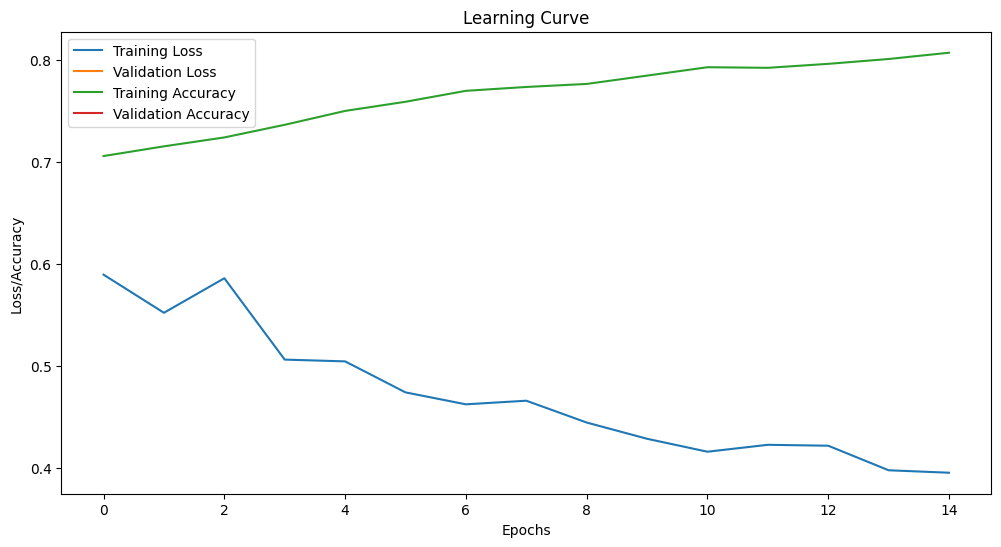

In [116]:
# Evaluate the best model
# Evaluate the best model
best_model = grid_result.best_estimator_
loss, accuracy = best_model.model_.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Access history and plot the learning curve
history = best_model.history_
plt.figure(figsize=(12, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [109]:
#Best: 0.7733321610522778 using {'model__dropout_rate': 0.4, 'model__learning_rate': 0.001, 'model__units': 100}
import pickle

# Save the best model
filename = 'models/lstm_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

#### Best model

In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, LeakyReLU, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical



df_lstm_2 = df_station_57_filled.copy()
df_lstm_2['hour_minute'] = df_station_57_filled['hour'] + df_station_57_filled['grouped_minute'] / 60
df_lstm_2['day'] = df_station_57_filled['grouped_date'].dt.day.astype(int)
# Assuming df_rfg is your DataFrame
# Feature and target definition

features = ['day_of_week', 'hour_minute', 'temperature', 'rainfall',
             'season', 'is_weekend', 'month']

target = 'docking_available'

# Encoding categorical features
categorical_features = ['day_of_week',  'is_weekend', 'hour_minute', 'season', 'month']
numerical_features = ['temperature', 'rainfall']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Process features
X = df_lstm_2[features]
y = df_lstm_2[target]

X_processed = preprocessor.fit_transform(X)

# Create sequences
def create_sequences(data, target, sequence_length=24):
    X_seq, y_seq = [], []
    for i in range(len(data) - sequence_length):
        X_seq.append(data[i:i + sequence_length])
        y_seq.append(target[i + sequence_length])
    return np.array(X_seq), np.array(y_seq)

sequence_length = 96
X_processed = X_processed.toarray() 
X_seq, y_seq = create_sequences(X_processed, y.values, sequence_length)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

num_classes = len(np.unique(y))

# Convert target variable to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

best_model
# Train the model
history = best_model.fit(X_train, y_train_encoded, validation_split=0.2)

# Evaluate the model
loss, accuracy = best_model.model_.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict
y_pred_prob = best_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels



/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.7039 - loss: 0.6037 - val_accuracy: 0.7071 - val_loss: 0.5903
Epoch 2/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.7126 - loss: 0.6290 - val_accuracy: 0.7076 - val_loss: 0.5953
Epoch 3/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7176 - loss: 0.5710 - val_accuracy: 0.7230 - val_loss: 0.5267
Epoch 4/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7324 - loss: 0.5660 - val_accuracy: 0.7221 - val_loss: 0.9746
Epoch 5/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.7405 - loss: 0.5098 - val_accuracy: 0.7421 - val_loss: 0.5123
Epoch 6/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.7489 - loss: 0.4926 - val_accuracy: 0.7501 - val_loss: 0.4973
Epoch 7/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7583 - loss: 0.4799 - val_accuracy: 0.7540 - val_loss: 0.4837
Epoch 8/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.7650 - loss: 0.4699 - 

In [121]:
# Evaluate the model
loss, accuracy = best_model.model_.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict
y_pred_prob = best_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7818 - loss: 0.4261
Test Loss: 0.4296092689037323
Test Accuracy: 0.781699538230896
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


Accuracy: 0.7816995402639775
Confusion Matrix:
 [[ 921 1010]
 [ 462 4350]]
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.48      0.56      1931
        True       0.81      0.90      0.86      4812

    accuracy                           0.78      6743
   macro avg       0.74      0.69      0.71      6743
weighted avg       0.77      0.78      0.77      6743

Precision:  0.8115671641791045
Recall:  0.9039900249376559
F1 Score:  0.8552890287062525
ROC AUC:  0.6904724852808424


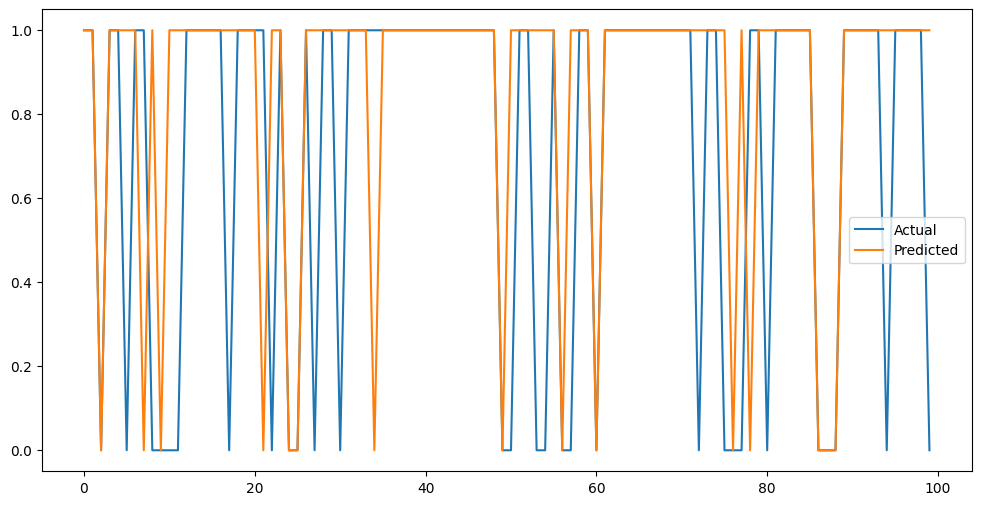

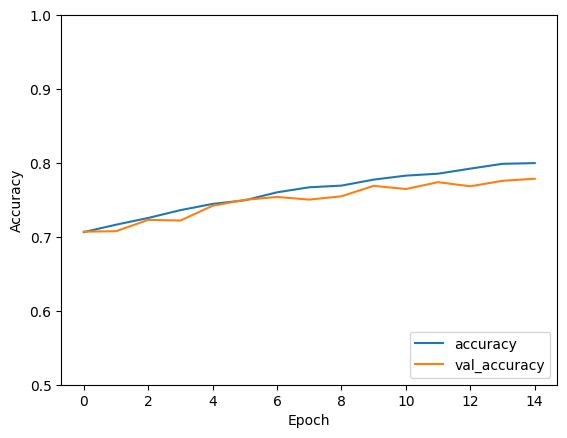

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
# Evaluate Accuracy, precision, recall, F1-score, ROC curve, AUC.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("ROC AUC: ", roc_auc)

# Plotting the training history
import matplotlib.pyplot as plt

# Example to show some predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.show()

plt.plot(history.history_['accuracy'], label='accuracy')
plt.plot(history.history_['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

##### Roc Auc Curve

843/843 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
ROC AUC Train 0.8720445381177114
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
ROC AUC Test 0.843593103810472


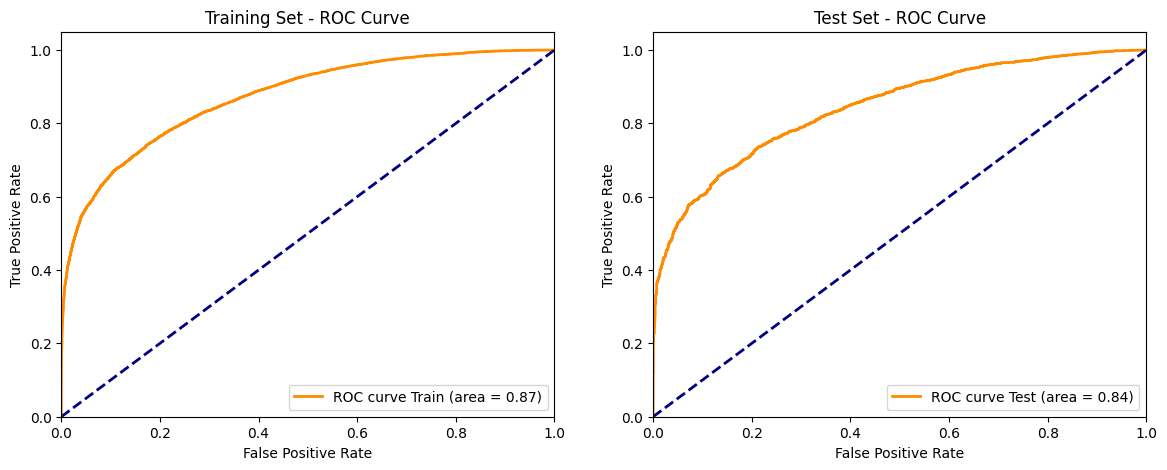

In [125]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Compute ROC curve and AUC
y_prob_train = best_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
roc_auc_train = auc(fpr_train, tpr_train)
print('ROC AUC Train', roc_auc_train)
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('ROC AUC Test', roc_auc)
#plot both curves
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve Train (area = {roc_auc_train:0.2f})')
ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Training Set - ROC Curve')
ax[0].legend(loc='lower right')
ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve Test (area = {roc_auc:0.2f})')
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Test Set - ROC Curve')
ax[1].legend(loc='lower right')
plt.show()

##### Confusion Matrix

In [128]:
import plotly.express as px
fig = px.imshow(conf_matrix, text_auto=True,labels=dict(x="Predicted", y="True", color="Count"))
fig.update_layout(title='Confusion Matrix')
fig.update_xaxes(title_text='Predicted', tickvals = [0, 1], ticktext = ['No', 'Yes'])
fig.update_yaxes(title_text='True', tickvals = [0, 1], ticktext = ['No', 'Yes'])
fig.show()

##### FEature importance

In [129]:
# Permutation Feature Importance
from sklearn.inspection import permutation_importance

def compute_permutation_importance(model, X, y, n_repeats=10):
    results = permutation_importance(model, X, y, scoring='accuracy', n_repeats=n_repeats, random_state=42)
    return results

# Since permutation importance needs flattened inputs
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
y_test_flattened = np.argmax(y_test_encoded, axis=1)

importance_results = compute_permutation_importance(best_model, X_test_flattened, y_test_flattened)

# Get feature names after preprocessing
encoded_categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(encoded_categorical_features)

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'feature': all_feature_names, 'importance': importance_results.importances_mean})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(feature_importances)), feature_importances['importance'], align="center")
plt.yticks(range(len(feature_importances)), feature_importances['feature'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

ValueError: X has 2 dimensions, but this KerasClassifier is expecting 3 dimensions in X.